In [57]:
import Import_And_Curate_Data as IACD
import pandas as pd
import importlib
importlib.reload(IACD)
import numpy as np
import Compute_Chi as Chi
importlib.reload(Chi)
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.optimize import curve_fit
fitting_function= lambda  phi,t : Amplitude*np.cos(2*np.pi*50*t+phi)

In [43]:
filename = "../Data/bead_in_droplet_force-save-2023.04.04-11.38.20.642.txt"
with open(filename, 'r') as file:
            lines = file.readlines()
            col_line = [line for line in lines if line.startswith('# columns:')][0] # just take the first line that start with "# columns:"
            col_names = col_line.replace('# columns:', '').replace('"', '').split()
df = pd.read_csv(filename,comment="#", delim_whitespace=True, header=None)
df.columns = col_names
print(df.columns)

Index(['xSignal1', 'ySignal1', 'zSignal1', 'xSignal2', 'ySignal2', 'zSignal2',
       'time', 'seriesTime'],
      dtype='object')


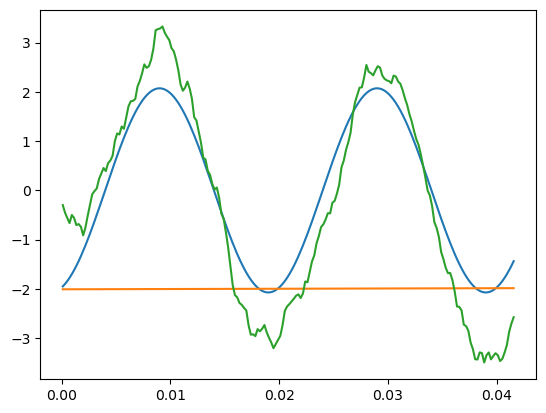

In [61]:
signal = df["xSignal1"][:200]*10**12
time = df['time'][:200]
Amplitude = np.sqrt(np.mean(signal**2))
fitting_function= lambda  t,phi : Amplitude*np.cos(2*np.pi*50*t+phi)
popt,pconv = curve_fit(fitting_function,time,signal,p0 = (np.pi/2))
plt.plot(time,fitting_function(time,*popt))
#plt.plot(time,fitting_function(np.sqrt(np.mean(signal**2)),np.pi/2,time))
plt.plot(time,fitting_function(np.pi/2,time))
plt.plot(time,signal)
#plt.xlim(0,0.5)

In [46]:
popt

array([12.03119197,  0.03170276])

In [3]:

dt = time[1]-time[0]
fourier_transform = np.fft.fft(signal)
freq = np.fft.fftfreq(signal.size, d=dt)
psd = np.abs(fourier_transform) ** 2

(0.0, 55.0)

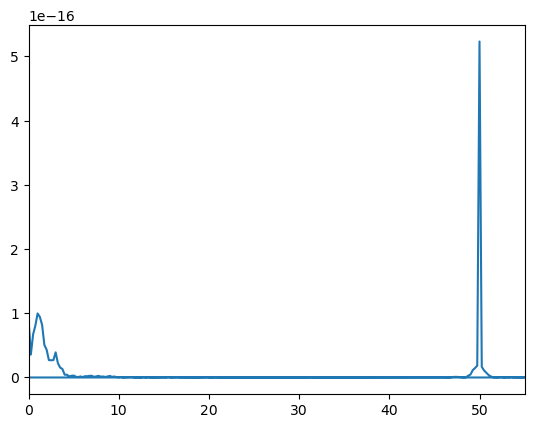

In [10]:
plt.plot(freq, psd)
#plt.yscale('log')
plt.xlim(0,55)

In [9]:
peak_idx = np.argmax( np.abs(psd))
print(freq[peak_idx])

50.00000080000001
